# Newton methods

Пусть $f(x)$ двады дифф в окрестности точки $x_*$ - строгого локального минимума.
Погрешность вычисления функции - $\Delta_f$.


In [1]:
from scipy.misc import derivative
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.animation as pltanimation
import seaborn as sns
%matplotlib notebook
# %matplotlib widget
# %matplotlib inline

## Middle-Point Method

### Intro information
$f(x)$ - differentiable, strictly unimodal on $[a_1, b_1]$.

Then one point of minimum will be stationary point $x_* \in [a_1, b_1]: f'(x_*) = 0$

### Idea
$\overline{x_1} = \frac{a_1 + b_2}{2}$ - middle point of $[a_1, b_1]$

$f'(\overline{x_1}) = K_1$. If $K_1 > 0$ then $[\overline{x_1}, b_1]$ is discarded, else if $K_1 < 0$ - $[a_1, \overline{x_1}]$ is discarded.

Obviously if $K = 0$ then we found our $x_* = \overline{x}$.

*The procedure is repeated on new segment.*

The condition to stop computation may be $K = 0$ or:

*on k-th step the following unequation may be truthful $l_{k+1} < \varepsilon_*$, where $l_{k+1} = b_{k+1} - a_{k+1}$,
$\varepsilon_*$ is the biggest acceptable undetermancy interval length*.

**This method reminds dichohomy one, but is faster**

<IPython.core.display.Javascript object>


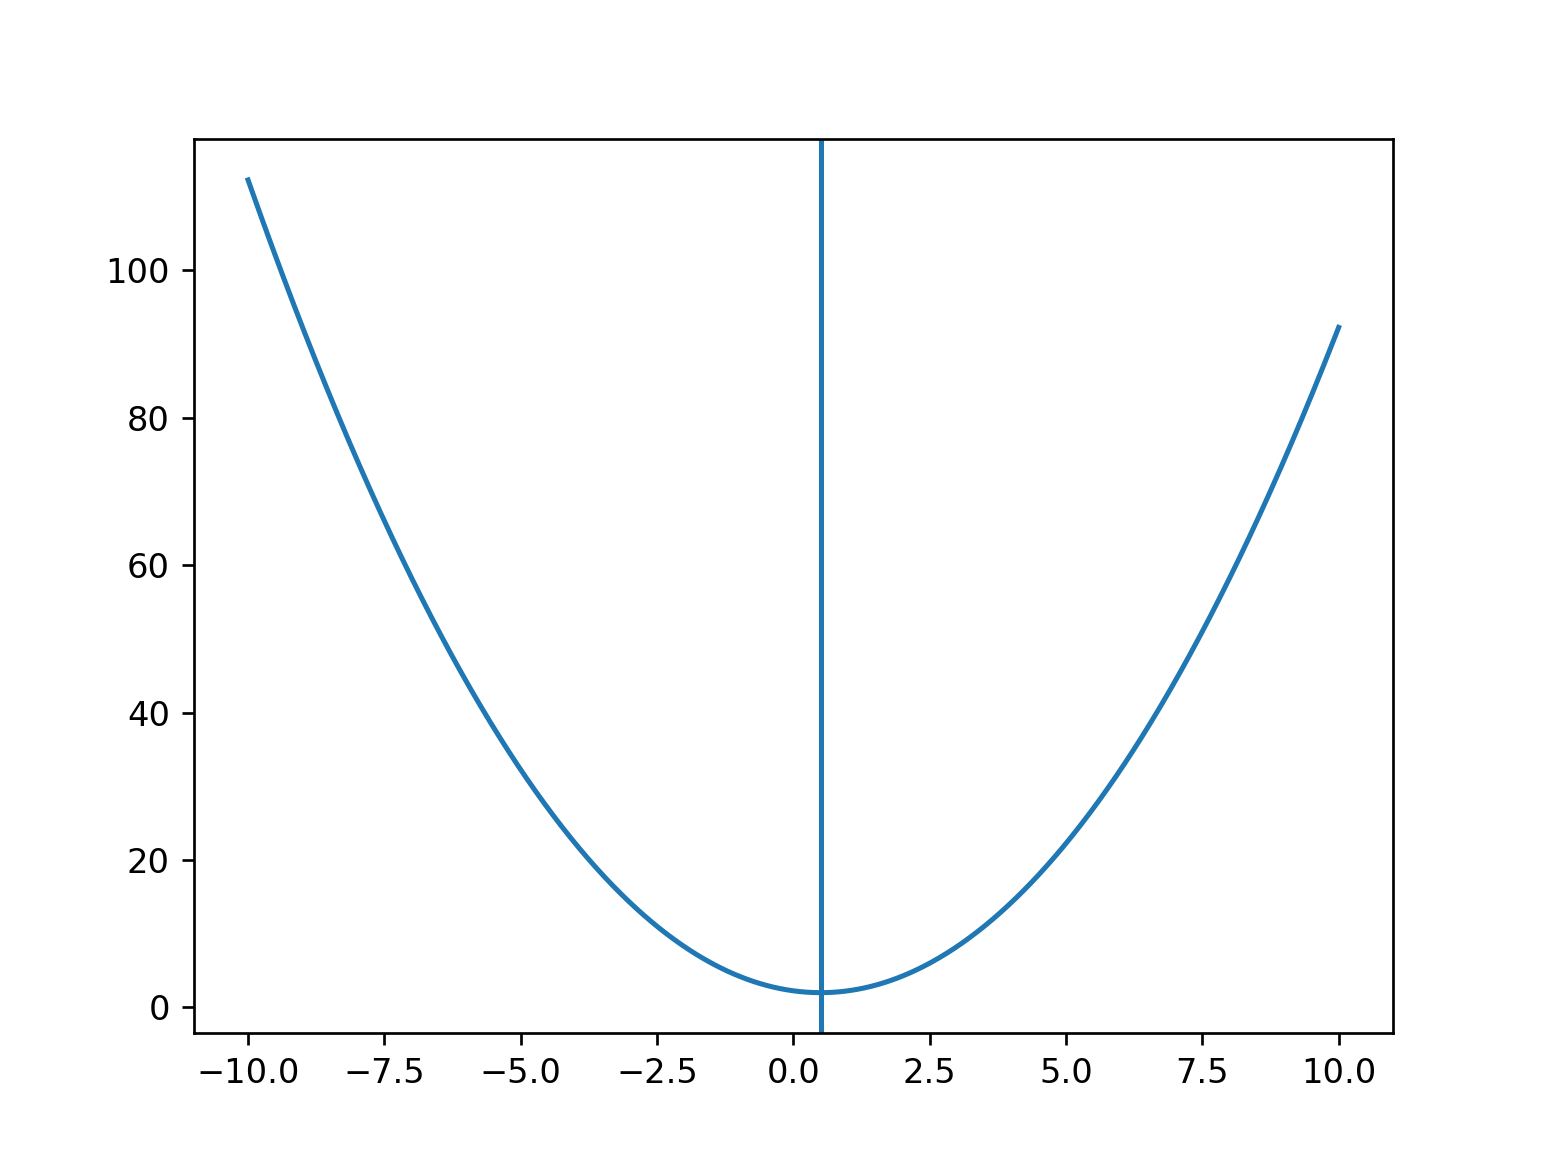

In [2]:
from matplotlib.patches import Rectangle

class AnimateMiddlePointMethod:
    anms = None
    fig = plt.figure(dpi=180)
    
    def __init__(self, f, x, k, a, b):
        self.f = f
        self.data = np.array([x, k, a, b])
    
    def add(self, x, k, a, b):
        self.data = np.vstack([self.data, [x, k, a, b]])
    
    def animate(self, i):
        plt.clf()
        
        a_1, b_1 = self.data[0, 2:]
        d = np.linspace(a_1, b_1, num=1000)
        a, b = self.data[i, 2:]

        self.plt_f = plt.plot(d, self.f(d))
        self.plt_area = plt.axvspan(a, b, 0, np.max(self.f(d)), color='red', alpha=0.3)
        self.plt_vert = plt.axvline(x=self.data[i, 0]) if self.data[i, 0] != None else None
    
    def get_animation(self):
        return pltanimation.FuncAnimation(self.fig, self.animate, frames=len(self.data), interval=700, repeat=True)
        
    

In [3]:
def middle_point_method(f, a, b, eps=1e-8):
    condition = lambda a, b: b - a < eps
    x = None
    k = None
    iteration = 0
    
    animation = AnimateMiddlePointMethod(f, x, k, a, b)
    
    while not condition(a, b) and k != 0:
        x = (a + b)/2
        k = derivative(f, x, dx=eps)
        
        animation.add(x, k, a, b)
        
        if k > 0:
            a, b = a, x
        elif k < 0:
            a, b = x, b
        iteration += 1
        
    return x, animation

In [4]:
f = lambda x: np.power(x-0.5, 2) + 2
res, animation = middle_point_method(f, -10, 10)
print(res)

0.49999999813735485


In [5]:
animation.get_animation().save('middle-point-method.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


## Newton method

Assume that we have twice-differentiable function $f: \mathbb{R} \rightarrow \mathbb{R}$

$x_0$ is zero approximation to $x_*$ is called *starting point*

Let's decompose our $f'(x)$ in Tailor series: 
$$
f'(x) \approx f'(x_0) + f''(x_0)(x-x_0) \\
$$

We pick next as next point $x_{k+1}$ in our sequence the point of intersection between tangent and X axis. Other words, we equal to zero our upper equation and then we get:
$$
x_{k+1} = x_k - \frac{f'(x_k)}{f''(x_k)} \\
$$

In [6]:
from scipy.misc import derivative

def der(f, x, n):
    return derivative(f, x, dx=np.float64(1e-7), n=n)

def newton_method(f, x, epsilon, a=0, b=0):
    print(x)
    anim = AnimateNewtonMethod(f, x, a, b)
    fd1 = der(f, x, 1)
    fd2 = der(f, x, 2)
    x2 = x - fd1/fd2
    anim.add(x2)
    print(x2, fd1, fd2)
    while(m.fabs(x - x2) > epsilon):
        x = x2
        fd1 = der(f, x, 1)
        fd2 = der(f, x, 2)
        x2 = x - fd1/fd2
        anim.add(x2)
        print(x2, fd1, fd2)
    return f(x2), anim

<IPython.core.display.Javascript object>


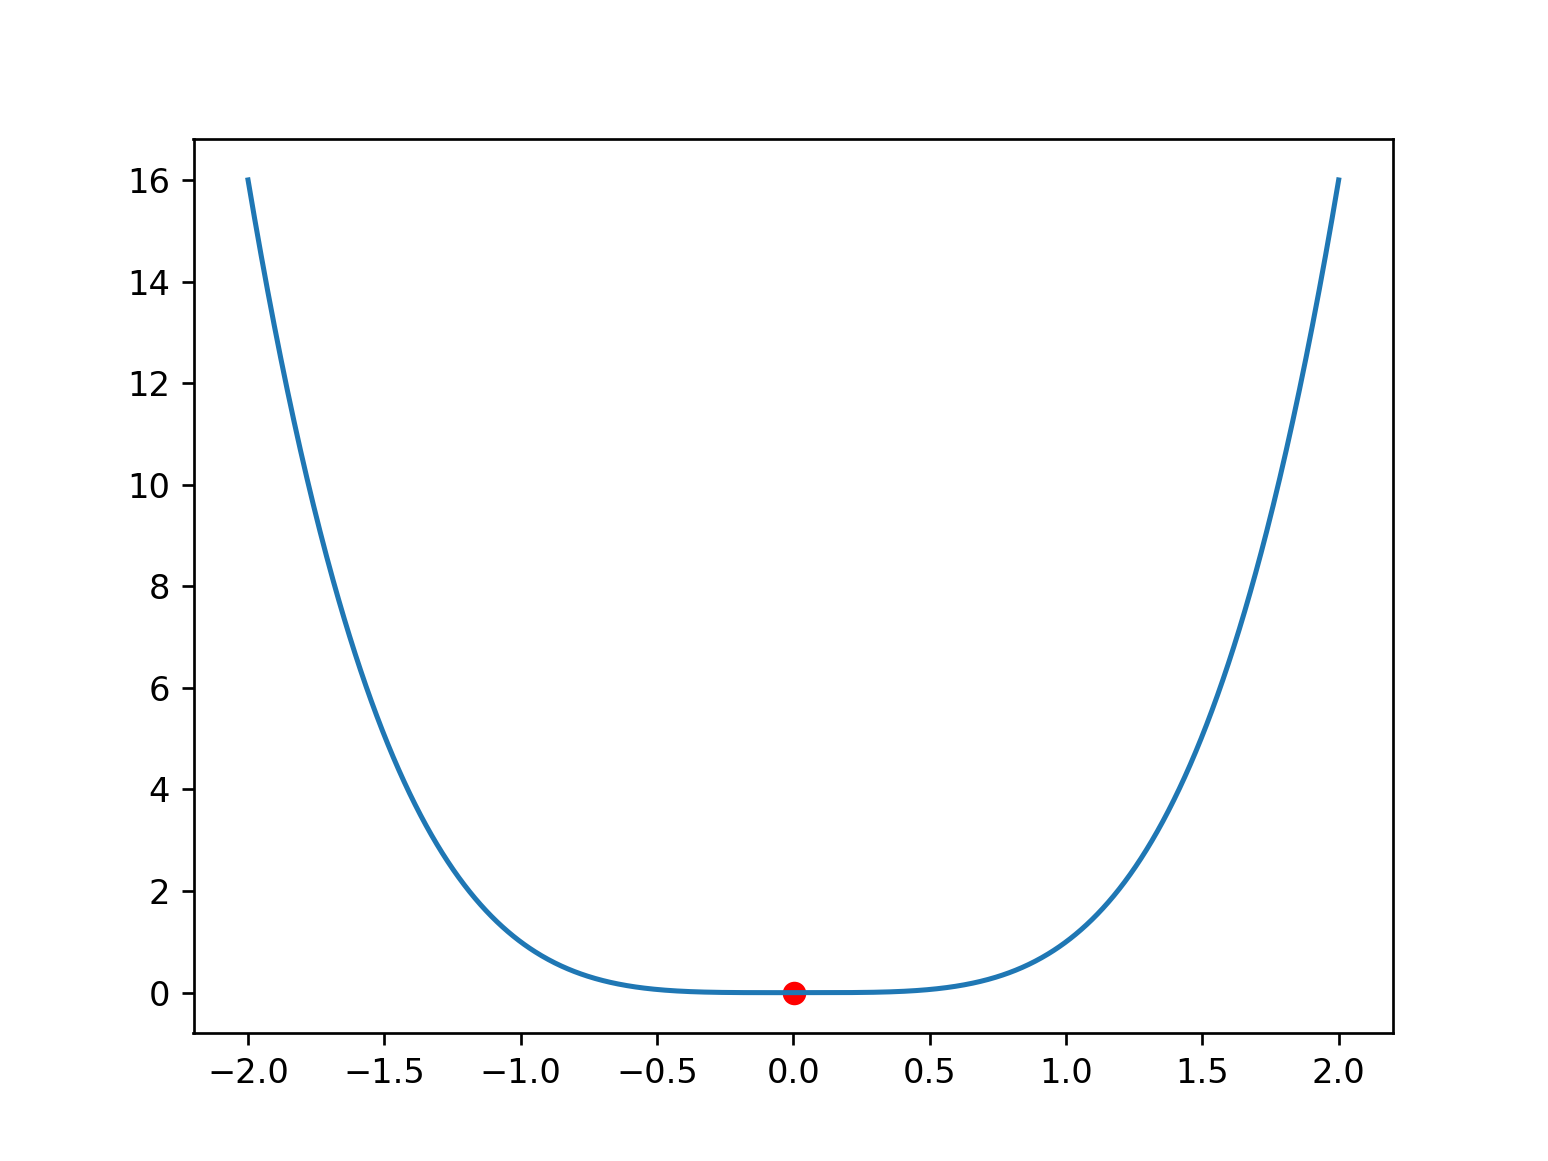

In [15]:
class AnimateNewtonMethod:
    anms = None
    fig = plt.figure(dpi=180)
    
    def __init__(self, f, x0, a0, b0):
        self.interval = [a0, b0]
        self.f = f
        self.data = np.array([x0])
    
    def add(self, x):
        self.data = np.vstack([self.data, [x]])
    
    def animate(self, i):
        plt.clf()
        
        x0 = self.data[0]
        d = np.linspace(*self.interval, num=1000)
        x = self.data[i]

        self.plt_f = plt.plot(d, self.f(d))
        self.current_point = plt.scatter(x, self.f(x), color='red')
#         self.plt_vert = plt.axvline(x=self.data[i, 0]) if self.data[i, 0] != None else None
    
    def get_animation(self):
        return pltanimation.FuncAnimation(self.fig, self.animate, frames=len(self.data), interval=700, repeat=True)
        

In [22]:
test = lambda x: x**2 + 16/x
test2 = lambda x: x**4
res, animation = newton_method(test2, 2.0, 0.001, a=-2, b=2)


animation.get_animation().save('newton-method.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


2.0
1.3278209513059702 31.999999992038397 47.60636329592672
0.8848233561379031 9.364369515374449 21.138646388862984
0.5901532465157071 2.770956606945596 9.403589018575078
0.3934646495037549 0.8221563072008387 4.179989687713715
0.2623179324449314 0.24365602238965445 1.8578888427711606
0.1748878057197975 0.0722011197834202 0.8258151107387591
0.11659110558981997 0.021396295030867707 0.367024119429793
0.07772783424456725 0.0063395182010286995 0.1631236378613066
0.05181850235093234 0.0018784069753878226 0.07249924402139009
0.03454562787300339 0.0005565632958166476 0.032221810939911395
0.02303040344658238 0.0001649070652044725 0.014320786039228458
0.01535359875061016 4.88612563178357e-05 0.0063647908541260255
0.010235733032379693 1.447739924567015e-05 0.0028287962292757847
0.006823821921639949 4.289600445536921e-06 0.0012572427318034327
0.004549214520600642 1.2709926689193417e-06 0.0005587745244909531
0.0030328096519313145 3.765903972209825e-07 0.0002483442285116424
0.002021873107257939 1.11

## Newton method modified

Instead of finding on every iteration $f''(x_k)$ we can use aproximation for second-order derivative:
$$
f''(x_{k+1}) \approx \frac{f'(x_k) - f'(x_{k-1})}{x_k - x_{k-1}}
$$
So on every iteration the next step we evalaute using this:
$$
x_{k+1} = x_k - \frac{f'(x_k) - f'(x_{k-1})}{x_k - x_{k-1}}\cdot f'(x_k)
$$
The first point, $x_1$ we evaluate this likeL
$$
x_1 = \frac{af'(b) - bf'(a)}{f'(b) - f'(a)}
$$

In [ ]:
def der(f, x, n):
    return derivative(f, x, dx=1e-6, n=n)

def newton_modified(f, a, b, epsilon):
    der1 = der(f, a, 1)
    derb = der(f, b, 1)
    sec_der = der(f, a, 2)
    x0 = a
    x1 = x0 - np.divide(der1, sec_der)
    der2 = derivative(f, x1, 1)
    k = 0
    print(x0, x1, der1, der2)
    while(m.fabs(x0 - x1) > epsilon):
        x2 = x1 - np.divide(x1 - x0, der2 - der1) * der2
        x0 = x1
        x1 = x2
        der1 = der2
        der2 = der(f, x1, 1)
        print(x0, x1, der1, der2)
    return f(x2), x2

In [ ]:
test = lambda x: x**2 + 16/x
print(newton_modified(test, 1.0, 4.0, 0.001))

### Qubic approximation

In [ ]:
def find_mu(x1, x2, f1, f2, df1, df2):
    z = df1 + df2 - 3*np.divide(f2-f1, x2-x1)
    w = np.sqrt(z**2 - df1*df2)
    mu = np.divide(w + z - df1, 2*w - df1 + df2) 
    return mu
    
def qubic_approx(f, a, b, epsilon):
    x1, x2 = a, b
    f1, f2 = f(a), f(b)
    df1, df2 = der(f, a, 1), der(f, b, 1)
    mu = find_mu(a, b, f(a), f(b), df1, df2)
    xm = x1 + mu*(x2 - x1)
    dfm = der(f, xm, 1)
    fm = f(xm)
    print(xm, fm)
    if df1*dfm < 0:
        x2 = xm
        f2 = fm
        df2 = dfm
    else:
        x1 = xm
        f1 = fm
        df1 = dfm
    k = 1
    while(np.absolute(dfm) > epsilon):
        mu = find_mu(x1, x2, f1, f2, df1, df2)
        xm = x1 + mu*(x2 - x1)
        dfm = der(f, xm, 1)
        fm = f(xm)
        print(xm, fm)
        if df1*dfm < 0:
            x2 = xm
            f2 = fm
            df2 = dfm
        else:
            x1 = xm
            f1 = fm
            df1 = dfm
        k += 1
    return fm, xm, k

In [ ]:
test = lambda x: x**2 + 16/x
test2 = lambda x: x**4
print(qubic_approx(test2, -1, 5.0, 0.01))